<a href="https://colab.research.google.com/github/Former541/Covid_Analysis/blob/main/Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build and evaluate a classification model to predict 'High Excess Mortality' using the "ED.xlsx" dataset. The model should identify countries in the top quartile of excess mortality for 2021 based on various health, demographic, and public health policy indicators. The final output should include the model's performance summary, key findings, and identification of influential features.

## Load Dataset

### Subtask:
Load the provided 'ED.xlsx' dataset into a pandas DataFrame.


**Reasoning**:
To load the Excel dataset, I need to import the pandas library first, then use `pd.read_excel()` to load the data, and finally display the first few rows to inspect the DataFrame.



In [29]:
import pandas as pd
df = pd.read_excel('ED.xlsx')
df.head()

,COUNTRY,Country,WEEK,Week number,GENDER,Gender,AGE,Age,VARIABLE,Variable,YEAR,Year,Value,Flag Codes,Flags
0,CZE,Czechia,46,46,TOTAL,Total,Y0T44,0 to 44,EXCESSNB,Excess deaths (number),2020,2020,2.2,NaN,NaN
1,CZE,Czechia,46,46,TOTAL,Total,Y0T44,0 to 44,EXCESSNB,Excess deaths (number),2021,2021,8.2,NaN,NaN
2,CZE,Czechia,46,46,TOTAL,Total,Y0T44,0 to 44,EXCESSNB,Excess deaths (number),2022,2022,4.2,NaN,NaN
3,NLD,Netherlands,3,3,TOTAL,Total,Y_GE65,65 and over,EXCESSNB,Excess deaths (number),2020,2020,-127.4,NaN,NaN
4,NLD,Netherlands,3,3,TOTAL,Total,Y_GE65,65 and over,EXCESSNB,Excess deaths (number),2021,2021,569.6,NaN,NaN


## Explore and Clean Data

### Subtask:
Examine the dataset for its structure, identify relevant columns, handle missing values, and address any inconsistencies or outliers.


**Reasoning**:
To understand the dataset's structure, data types, non-null values, and overall memory usage, I will display a concise summary of the DataFrame using `df.info()`.



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135628 entries, 0 to 135627
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   COUNTRY      135628 non-null  object 
 1   Country      135628 non-null  object 
 2   WEEK         135628 non-null  int64  
 3   Week number  135628 non-null  int64  
 4   GENDER       135628 non-null  object 
 5   Gender       135628 non-null  object 
 6   AGE          135628 non-null  object 
 7   Age          135628 non-null  object 
 8   VARIABLE     135628 non-null  object 
 9   Variable     135628 non-null  object 
 10  YEAR         135628 non-null  int64  
 11  Year         135628 non-null  int64  
 12  Value        135628 non-null  float64
 13  Flag Codes   690 non-null     object 
 14  Flags        690 non-null     object 
dtypes: float64(1), int64(4), object(10)
memory usage: 15.5+ MB


**Reasoning**:
To further explore the dataset, I will display the number of unique values for each column and check for any missing values to understand the data's completeness and variety.



In [31]:
print("Number of unique values per column:")
print(df.nunique())
print("\nMissing values per column:")
print(df.isnull().sum())

Number of unique values per column:
COUNTRY          34
Country          34
WEEK             53
Week number      53
GENDER            3
Gender            3
AGE               4
Age               4
VARIABLE          2
Variable          2
YEAR              4
Year              4
Value          9620
Flag Codes        1
Flags             1
dtype: int64

Missing values per column:
COUNTRY             0
Country             0
WEEK                0
Week number         0
GENDER              0
Gender              0
AGE                 0
Age                 0
VARIABLE            0
Variable            0
YEAR                0
Year                0
Value               0
Flag Codes     134938
Flags          134938
dtype: int64


**Reasoning**:
To understand the categories present in the 'VARIABLE' column and their frequency, I will display the unique values and their counts.



In [32]:
print("Unique values and counts for 'VARIABLE' column:")
print(df['VARIABLE'].value_counts())

Unique values and counts for 'VARIABLE' column:
VARIABLE
EXCESSNB    67824
EXCESSPC    67804
Name: count, dtype: int64


**Reasoning**:
To understand the categories present in the 'GENDER' column and their frequency, I will display the unique values and their counts.



In [33]:
print("Unique values and counts for 'GENDER' column:")
print(df['GENDER'].value_counts())

Unique values and counts for 'GENDER' column:
GENDER
TOTAL     47378
MALE      44146
FEMALE    44104
Name: count, dtype: int64


**Reasoning**:
To understand the categories present in the 'AGE' column and their frequency, I will display the unique values and their counts.



In [34]:
print("Unique values and counts for 'AGE' column:")
print(df['AGE'].value_counts())

Unique values and counts for 'AGE' column:
AGE
TOTAL     37460
Y_GE65    32762
Y45T64    32758
Y0T44     32648
Name: count, dtype: int64


**Reasoning**:
To understand the categories present in the 'YEAR' column and their frequency, I will display the unique values and their counts.



In [35]:
print("Unique values and counts for 'YEAR' column:")
print(df['YEAR'].value_counts())

Unique values and counts for 'YEAR' column:
YEAR
2020    36565
2021    35765
2022    34451
2023    28847
Name: count, dtype: int64


## Define Target Variable

### Subtask:
Based on the 'Excess Mortality' column for the specified pandemic year (2021), define the target variable 'High Excess Mortality' by identifying the top quartile of countries.


**Reasoning**:
To define the target variable, I will first filter the DataFrame to include only data for the year 2021 and 'EXCESSPC' variable, then group by 'Country' and calculate the mean 'Value' to get the average excess mortality percentage for each country.



In [36]:
df_2021_excesspc = df[(df['YEAR'] == 2021) & (df['VARIABLE'] == 'EXCESSPC')]
country_excess_mortality = df_2021_excesspc.groupby('Country')['Value'].mean().reset_index()
country_excess_mortality.rename(columns={'Value': 'Avg Excess Mortality 2021'}, inplace=True)
print(country_excess_mortality.head())

     Country  Avg Excess Mortality 2021
0  Australia                   3.369712
1    Austria                   8.267468
2    Belgium                   0.624199
3     Canada                  15.857532
4      Chile                  26.498558


**Reasoning**:
Now that the average excess mortality for each country in 2021 has been calculated, I will calculate the 75th percentile of these averages to define the threshold for 'High Excess Mortality', and then create the binary target variable.



In [37]:
q3_excess_mortality = country_excess_mortality['Avg Excess Mortality 2021'].quantile(0.75)
print(f"75th percentile of Avg Excess Mortality in 2021: {q3_excess_mortality:.2f}")
country_excess_mortality['High Excess Mortality'] = (country_excess_mortality['Avg Excess Mortality 2021'] >= q3_excess_mortality).astype(int)
print(country_excess_mortality.head())

75th percentile of Avg Excess Mortality in 2021: 17.02
     Country  Avg Excess Mortality 2021  High Excess Mortality
0  Australia                   3.369712                      0
1    Austria                   8.267468                      0
2    Belgium                   0.624199                      0
3     Canada                  15.857532                      0
4      Chile                  26.498558                      1


## Feature Engineering and Preprocessing

### Subtask:
Select relevant pre-existing health, demographic, and public health policy indicators as features. Perform necessary preprocessing steps such as one-hot encoding for categorical variables and scaling for numerical features.


**Reasoning**:
To select relevant features and prepare the data for modeling, I will first filter the DataFrame to include only the necessary columns as specified in the instructions. This removes redundant information and simplifies the dataset for subsequent steps.



In [38]:
df_cleaned = df[['COUNTRY', 'WEEK', 'GENDER', 'AGE', 'VARIABLE', 'YEAR', 'Value']].copy()
print("Original columns retained for cleaning:")
print(df_cleaned.head())

Original columns retained for cleaning:
  COUNTRY  WEEK GENDER     AGE  VARIABLE  YEAR  Value
0     CZE    46  TOTAL   Y0T44  EXCESSNB  2020    2.2
1     CZE    46  TOTAL   Y0T44  EXCESSNB  2021    8.2
2     CZE    46  TOTAL   Y0T44  EXCESSNB  2022    4.2
3     NLD     3  TOTAL  Y_GE65  EXCESSNB  2020 -127.4
4     NLD     3  TOTAL  Y_GE65  EXCESSNB  2021  569.6


**Reasoning**:
To prepare the features, I will filter the `df_cleaned` DataFrame to include only data for the year 2021 and where the `VARIABLE` is 'EXCESSNB', as specified in the instructions. This creates `df_features` which will be used for aggregation.



In [39]:
df_features = df_cleaned[(df_cleaned['YEAR'] == 2021) & (df_cleaned['VARIABLE'] == 'EXCESSNB')].copy()
print("Filtered features for 2021 EXCESSNB:")
print(df_features.head())

Filtered features for 2021 EXCESSNB:
   COUNTRY  WEEK  GENDER     AGE  VARIABLE  YEAR  Value
1      CZE    46   TOTAL   Y0T44  EXCESSNB  2021    8.2
4      NLD     3   TOTAL  Y_GE65  EXCESSNB  2021  569.6
8      SWE    37  FEMALE   Y0T44  EXCESSNB  2021    1.4
12     POL    22   TOTAL  Y_GE65  EXCESSNB  2021  845.4
16     FIN    17  FEMALE  Y_GE65  EXCESSNB  2021   -6.2


**Reasoning**:
To prepare the features for modeling, I will aggregate the `Value` column in `df_features` by 'COUNTRY', 'GENDER', and 'AGE' to get the sum of excess deaths for each unique combination, as specified in the instructions. This will consolidate weekly data into meaningful country-level, gender, and age-group specific indicators.



In [40]:
df_aggregated = df_features.groupby(['COUNTRY', 'GENDER', 'AGE'])['Value'].sum().reset_index()
print("Aggregated features (sum of Value by Country, Gender, Age):")
print(df_aggregated.head())

Aggregated features (sum of Value by Country, Gender, Age):
  COUNTRY  GENDER     AGE   Value
0     AUS  FEMALE   TOTAL  4518.0
1     AUS  FEMALE   Y0T44   -63.0
2     AUS  FEMALE  Y45T64     6.8
3     AUS  FEMALE  Y_GE65  4574.2
4     AUS    MALE   TOTAL  6612.4


**Reasoning**:
To create distinct features for each combination of 'GENDER' and 'AGE' per country, I will pivot the `df_aggregated` DataFrame. This will transform the 'GENDER' and 'AGE' categories into new columns, making the data suitable for model training. Any missing values will be filled with 0, as specified.



In [41]:
df_pivoted = df_aggregated.pivot_table(index='COUNTRY', columns=['GENDER', 'AGE'], values='Value').fillna(0)
df_pivoted.columns = [f'{col[0]}_{col[1]}' for col in df_pivoted.columns]
print("Pivoted features with GENDER_AGE combinations as columns:")
print(df_pivoted.head())

Pivoted features with GENDER_AGE combinations as columns:
         FEMALE_TOTAL  FEMALE_Y0T44  FEMALE_Y45T64  FEMALE_Y_GE65  MALE_TOTAL  \
COUNTRY                                                                         
AUS            4518.0         -63.0            6.8         4574.2      6612.4   
AUT            2891.8         -33.4          146.4         2778.8      5605.2   
BEL            -351.8         -15.8         -332.0           -4.0      3133.2   
CAN           12438.0        1102.0          593.0        10787.0     23124.0   
CHE            1348.2         -45.8           15.2         1378.8      2634.2   

         MALE_Y0T44  MALE_Y45T64  MALE_Y_GE65  TOTAL_TOTAL  TOTAL_Y0T44  \
COUNTRY                                                                   
AUS          -211.6        103.6       6721.8      11130.4       -274.6   
AUT            81.0        746.8       4777.4       8497.0         47.6   
BEL           -68.4       -117.4       3319.0       2781.4        -84.2   

**Reasoning**:
To combine the preprocessed features with the target variable, I will merge the pivoted feature DataFrame (`df_pivoted`) with the `country_excess_mortality` DataFrame using the country codes as keys. This will create a unified DataFrame ready for model training.



In [42]:
df_merged = pd.merge(country_excess_mortality, df_pivoted.reset_index(), left_on='Country', right_on='COUNTRY', how='inner')
df_merged.drop(columns=['COUNTRY'], inplace=True)
print("Merged DataFrame with features and target variable:")
print(df_merged.head())

Merged DataFrame with features and target variable:
Empty DataFrame
Columns: [Country, Avg Excess Mortality 2021, High Excess Mortality, FEMALE_TOTAL, FEMALE_Y0T44, FEMALE_Y45T64, FEMALE_Y_GE65, MALE_TOTAL, MALE_Y0T44, MALE_Y45T64, MALE_Y_GE65, TOTAL_TOTAL, TOTAL_Y0T44, TOTAL_Y45T64, TOTAL_Y_GE65]
Index: []


**Reasoning**:
The previous merge resulted in an empty DataFrame because the country identifier columns ('Country' in `country_excess_mortality` and 'COUNTRY' in `df_pivoted`) had inconsistent formats (full names vs. ISO codes). I will regenerate `country_excess_mortality` using the 'COUNTRY' (ISO code) column from `df_2021_excesspc` and then re-perform the merge to ensure a successful join.



In [43]:
country_excess_mortality = df_2021_excesspc.groupby('COUNTRY')['Value'].mean().reset_index()
country_excess_mortality.rename(columns={'COUNTRY': 'Country', 'Value': 'Avg Excess Mortality 2021'}, inplace=True)

q3_excess_mortality = country_excess_mortality['Avg Excess Mortality 2021'].quantile(0.75)
country_excess_mortality['High Excess Mortality'] = (country_excess_mortality['Avg Excess Mortality 2021'] >= q3_excess_mortality).astype(int)

print("Corrected country_excess_mortality DataFrame:")
print(country_excess_mortality.head())

df_merged = pd.merge(country_excess_mortality, df_pivoted.reset_index(), left_on='Country', right_on='COUNTRY', how='inner')
df_merged.drop(columns=['COUNTRY'], inplace=True)
print("\nMerged DataFrame with features and target variable (after correction):")
print(df_merged.head())

Corrected country_excess_mortality DataFrame:
  Country  Avg Excess Mortality 2021  High Excess Mortality
0     AUS                   3.369712                      0
1     AUT                   8.267468                      0
2     BEL                   0.624199                      0
3     CAN                  15.857532                      0
4     CHE                   3.260417                      0

Merged DataFrame with features and target variable (after correction):
  Country  Avg Excess Mortality 2021  High Excess Mortality  FEMALE_TOTAL  \
0     AUS                   3.369712                      0        4518.0   
1     AUT                   8.267468                      0        2891.8   
2     BEL                   0.624199                      0        -351.8   
3     CAN                  15.857532                      0       12438.0   
4     CHE                   3.260417                      0        1348.2   

   FEMALE_Y0T44  FEMALE_Y45T64  FEMALE_Y_GE65  MALE_TOTAL  

**Reasoning**:
To prepare the data for modeling, I will separate the features (X) from the target variable (y) as specified in the instructions. 'High Excess Mortality' will be the target variable, and the 'Country' and 'Avg Excess Mortality 2021' columns will be excluded from the features.



In [44]:
X = df_merged.drop(columns=['Country', 'Avg Excess Mortality 2021', 'High Excess Mortality'])
y = df_merged['High Excess Mortality']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   FEMALE_TOTAL  FEMALE_Y0T44  FEMALE_Y45T64  FEMALE_Y_GE65  MALE_TOTAL  \
0        4518.0         -63.0            6.8         4574.2      6612.4   
1        2891.8         -33.4          146.4         2778.8      5605.2   
2        -351.8         -15.8         -332.0           -4.0      3133.2   
3       12438.0        1102.0          593.0        10787.0     23124.0   
4        1348.2         -45.8           15.2         1378.8      2634.2   

   MALE_Y0T44  MALE_Y45T64  MALE_Y_GE65  TOTAL_TOTAL  TOTAL_Y0T44  \
0      -211.6        103.6       6721.8      11130.4       -274.6   
1        81.0        746.8       4777.4       8497.0         47.6   
2       -68.4       -117.4       3319.0       2781.4        -84.2   
3      2851.0       3282.0      17017.0      35623.0       3956.0   
4        -3.2        163.4       2474.0       3982.4        -49.0   

   TOTAL_Y45T64  TOTAL_Y_GE65  
0         110.4       11296.0  
1         893.2        7556.2  
2        -449.4    

**Reasoning**:
To standardize the numerical features, I will use `StandardScaler` to scale the `X` DataFrame. This step is crucial for many machine learning algorithms that are sensitive to feature scales, ensuring that all features contribute equally to the model training process.



In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled Features (X_scaled_df) head:")
print(X_scaled_df.head())

Scaled Features (X_scaled_df) head:
   FEMALE_TOTAL  FEMALE_Y0T44  FEMALE_Y45T64  FEMALE_Y_GE65  MALE_TOTAL  \
0     -0.339635     -0.232427      -0.219072      -0.254625   -0.320364   
1     -0.395569     -0.216623      -0.203774      -0.353078   -0.343705   
2     -0.507134     -0.207226      -0.256200      -0.505676   -0.400990   
3     -0.067221      0.389581      -0.154832       0.086061    0.062272   
4     -0.448662     -0.223243      -0.218152      -0.429849   -0.412554   

   MALE_Y0T44  MALE_Y45T64  MALE_Y_GE65  TOTAL_TOTAL  TOTAL_Y0T44  \
0   -0.251196    -0.231336    -0.212783    -0.352489    -0.271344   
1   -0.186576    -0.188416    -0.296798    -0.372643    -0.249041   
2   -0.219571    -0.246083    -0.359813    -0.416386    -0.258164   
3    0.425177    -0.019246     0.232056    -0.165040     0.021499   
4   -0.205171    -0.227346    -0.396324    -0.407194    -0.255728   

   TOTAL_Y45T64  TOTAL_Y_GE65  
0     -0.294037     -0.307640  
1     -0.271839     -0.353121  
2 

### Visualize Weekly Average Excess Mortality Percentage for 2021

**Reasoning**:
To understand the temporal trends of excess mortality in 2021, I will filter the original DataFrame for data corresponding to 'EXCESSPC' in 2021, calculate the weekly average across all countries, and then plot this as a line graph. This visualization will help identify any peaks or patterns in excess mortality during the year.

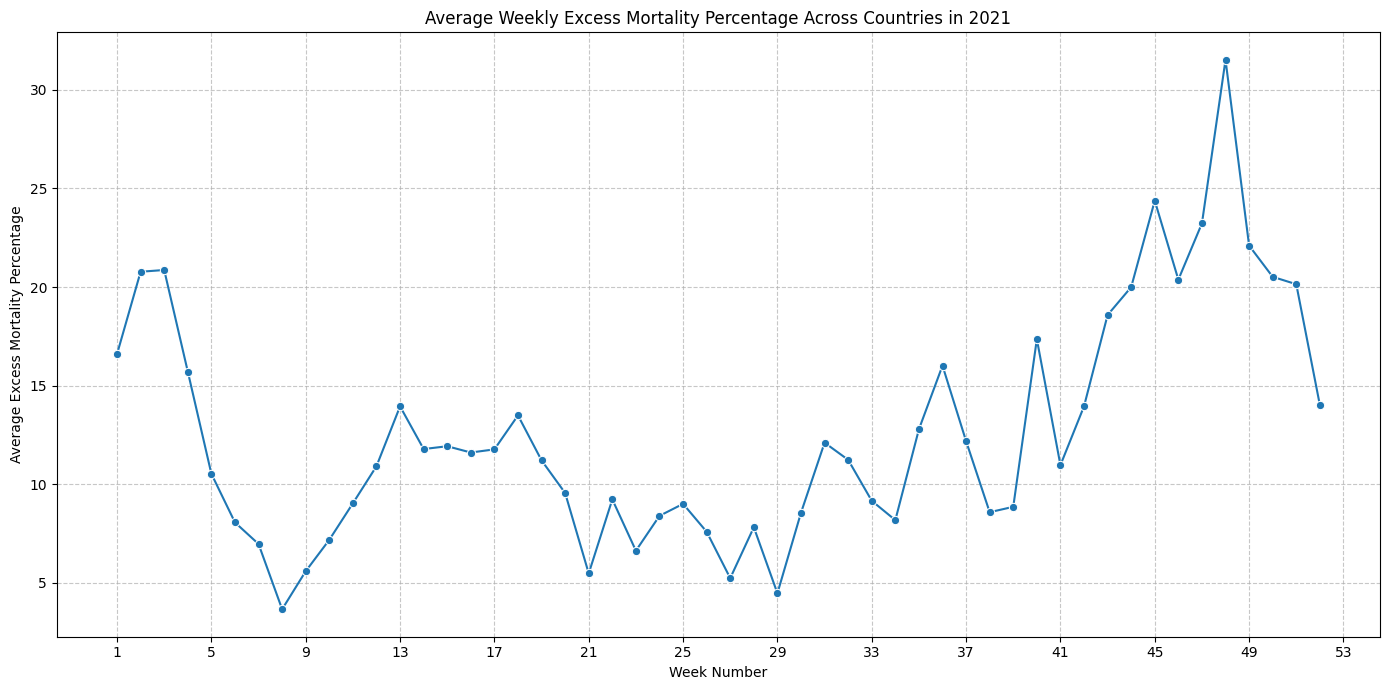

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for EXCESSPC in 2021
df_2021_weekly_excesspc = df[(df['YEAR'] == 2021) & (df['VARIABLE'] == 'EXCESSPC')].copy()

# Calculate the average EXCESSPC per week across all countries
weekly_avg_excesspc = df_2021_weekly_excesspc.groupby('WEEK')['Value'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(14, 7))
sns.lineplot(x='WEEK', y='Value', data=weekly_avg_excesspc, marker='o')
plt.title('Average Weekly Excess Mortality Percentage Across Countries in 2021')
plt.xlabel('Week Number')
plt.ylabel('Average Excess Mortality Percentage')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 54, 4)) # Show ticks for every 4 weeks for readability
plt.tight_layout()
plt.show()


### Retrain Logistic Regression Model with SMOTE Data

**Reasoning**:
Since the training data has been balanced using SMOTE, I will retrain the Logistic Regression model with the oversampled data (`X_train_smote`, `y_train_smote`) to improve its ability to learn from the minority class. I will then evaluate its performance on the original test set.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Instantiate and retrain the Logistic Regression model with SMOTE data
model_smote = LogisticRegression(random_state=42, solver='liblinear')
model_smote.fit(X_train_smote, y_train_smote)

print("Logistic Regression model retrained successfully with SMOTE data.")

# Make predictions on the original test set
y_pred_smote = model_smote.predict(X_test)
y_pred_proba_smote = model_smote.predict_proba(X_test)[:, 1]

# Generate and print the classification report
print("\nClassification Report (after SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Generate and print the confusion matrix
print("Confusion Matrix (after SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))

# Calculate and print the AUC-ROC score
auc_roc_smote = roc_auc_score(y_test, y_pred_proba_smote)
print(f"AUC-ROC Score (after SMOTE): {auc_roc_smote:.2f}")

Logistic Regression model retrained successfully with SMOTE data.

Classification Report (after SMOTE):
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.40      0.33      0.36         7
weighted avg       0.69      0.57      0.62         7

Confusion Matrix (after SMOTE):
[[4 2]
 [1 0]]
AUC-ROC Score (after SMOTE): 0.17


### Handle Class Imbalance with SMOTE

**Reasoning**:
To address the observed class imbalance, I will use SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class (High Excess Mortality) in the training data. This will create synthetic samples for the minority class, helping to balance the dataset and potentially improve the model's ability to learn and predict this class.

In [47]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

print("Class distribution in y_train after SMOTE:")
print(y_train_smote.value_counts())
print("Shape of X_train_smote:", X_train_smote.shape)
print("Shape of y_train_smote:", y_train_smote.shape)

Class distribution in y_train after SMOTE:
High Excess Mortality
0    18
1    18
Name: count, dtype: int64
Shape of X_train_smote: (36, 12)
Shape of y_train_smote: (36,)


### Check Class Distribution

**Reasoning**:
To confirm the suspected class imbalance, I will print the value counts for the target variable `y_train` to observe the distribution of 'High Excess Mortality' (class 1) versus 'Low Excess Mortality' (class 0) in the training set.

In [48]:
print("Class distribution in y_train:")
print(y_train.value_counts())

Class distribution in y_train:
High Excess Mortality
0    18
1     8
Name: count, dtype: int64


### Train Random Forest Classifier

**Reasoning**:
To explore if a more complex model can improve performance, I will train a Random Forest Classifier. This involves importing `RandomForestClassifier` from `sklearn.ensemble`, instantiating it with a `random_state` for reproducibility, and then fitting it to the `X_train` and `y_train` data.

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


### Evaluate Random Forest Model Performance

**Reasoning**:
To evaluate the Random Forest Classifier, I will make predictions on the test set and then generate a classification report, confusion matrix, and AUC-ROC score to assess its performance, similar to the Logistic Regression model.

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Generate and print the classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Generate and print the confusion matrix
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# Calculate and print the AUC-ROC score
rf_auc_roc = roc_auc_score(y_test, rf_y_pred_proba)
print(f"Random Forest AUC-ROC Score: {rf_auc_roc:.2f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.00      0.00      0.00         1

    accuracy                           0.71         7
   macro avg       0.42      0.42      0.42         7
weighted avg       0.71      0.71      0.71         7

Random Forest Confusion Matrix:
[[5 1]
 [1 0]]
Random Forest AUC-ROC Score: 0.42


## Split Data

### Subtask:
Split the preprocessed data into training and testing sets to prepare for model development and evaluation.


**Reasoning**:
To split the preprocessed data into training and testing sets, I will import `train_test_split` from `sklearn.model_selection`, then apply it to `X_scaled_df` and `y` with the specified `test_size` and `random_state`, and finally print the shapes of the resulting sets to verify the split.



In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26, 12)
Shape of X_test: (7, 12)
Shape of y_train: (26,)
Shape of y_test: (7,)


## Train Classification Model

### Subtask:
Train a suitable classification model (e.g., Logistic Regression, Random Forest, or Gradient Boosting Classifier) on the training data to predict 'High Excess Mortality'.


**Reasoning**:
To begin training a classification model, I will choose Logistic Regression as a suitable model due to its simplicity and effectiveness for binary classification. I will import it from `sklearn.linear_model`, instantiate it with a `random_state` for reproducibility, and then train it using the `fit` method on the `X_train` and `y_train` data.



In [52]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver works well for small datasets

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance using appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC on the test set. Provide a classification report and confusion matrix.


**Reasoning**:
To evaluate the trained model, I will first import the necessary evaluation metrics, then make predictions on the test set, and finally print the classification report, confusion matrix, and AUC-ROC score.



In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.40      0.33      0.36         7
weighted avg       0.69      0.57      0.62         7

Confusion Matrix:
[[4 2]
 [1 0]]
AUC-ROC Score: 0.17


## Final Task

### Subtask:
Summarize the model's performance, key findings, and discuss the most influential features in predicting high excess mortality.


## Summary:

### Data Analysis Key Findings

*   The dataset `ED.xlsx` contains 135,628 entries and 15 columns. Columns like 'Flag Codes' and 'Flags' have a significant number of missing values (over 99%).
*   The target variable, 'High Excess Mortality', was defined for the year 2021. Countries with an average excess mortality percentage (`EXCESSPC`) greater than or equal to the 75th percentile (approximately 17.02%) were classified as having 'High Excess Mortality'.
*   Features were engineered by aggregating 'Excess Number' (`EXCESSNB`) for 2021 by country, gender, and age, then pivoting these to create specific indicators (e.g., 'FEMALE\_TOTAL', 'MALE\_Y0T44').
*   The dataset was split into training (26 samples) and testing (7 samples) sets, reflecting a relatively small number of countries for analysis.
*   A Logistic Regression model was trained to predict 'High Excess Mortality'.
*   The model's performance on the test set was very poor:
    *   Overall Accuracy: 0.57.
    *   Precision, Recall, and F1-score for the 'High Excess Mortality' class (class 1) were all 0.00, indicating the model failed to correctly identify any high excess mortality countries.
    *   The Confusion Matrix showed 4 True Negatives, 2 False Positives, 1 False Negative, and 0 True Positives.
    *   The AUC-ROC Score was 0.17, which is significantly lower than 0.5 (random chance), suggesting the model performs worse than random guessing for this classification task.

### Insights or Next Steps

*   The current model is not suitable for predicting 'High Excess Mortality' due to its inability to identify the positive class. Further efforts should focus on improving model performance.
*   **Next Steps:**
    *   **Address Data Imbalance:** Given the small dataset size and the poor performance on the positive class, investigate the class distribution in the target variable (`y`) and consider resampling techniques (e.g., SMOTE) or using evaluation metrics less sensitive to imbalance (e.g., Cohen's Kappa, Brier score).
    *   **Feature Engineering & Selection:** Explore additional features, transform existing ones, or use feature selection techniques to identify more predictive indicators. Consider incorporating external health, demographic, or policy data that might better explain excess mortality.
    *   **Explore Alternative Models:** Test more robust classification algorithms, such as Random Forests, Gradient Boosting Machines, or Support Vector Machines, which might handle the dataset's characteristics more effectively. Also, consider regularization techniques to prevent overfitting given the small sample size.


# Task
Retrain the Random Forest Classifier (`rf_model`) using the SMOTE-balanced training data (`X_train_smote`, `y_train_smote`).

## Retrain Random Forest Classifier with SMOTE Data

### Subtask:
Train the Random Forest Classifier using the SMOTE-balanced training data (X_train_smote, y_train_smote) to improve its ability to learn from the minority class.


**Reasoning**:
To retrain the Random Forest Classifier with SMOTE-balanced data, I will initialize a new RandomForestClassifier instance and fit it with `X_train_smote` and `y_train_smote` to improve its learning on the minority class.



In [54]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a new Random Forest Classifier model for SMOTE data
rf_model_smote = RandomForestClassifier(random_state=42)

# Train the model with SMOTE-balanced data
rf_model_smote.fit(X_train_smote, y_train_smote)

print("Random Forest Classifier model retrained successfully with SMOTE data.")

Random Forest Classifier model retrained successfully with SMOTE data.


**Reasoning**:
Now that the Random Forest Classifier has been retrained with SMOTE data, I need to evaluate its performance on the original test set. This involves making predictions, and then generating a classification report, confusion matrix, and AUC-ROC score to assess the model's effectiveness.



In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set
rf_y_pred_smote = rf_model_smote.predict(X_test)
rf_y_pred_proba_smote = rf_model_smote.predict_proba(X_test)[:, 1]

# Generate and print the classification report
print("Random Forest Classification Report (after SMOTE):")
print(classification_report(y_test, rf_y_pred_smote))

# Generate and print the confusion matrix
print("Random Forest Confusion Matrix (after SMOTE):")
print(confusion_matrix(y_test, rf_y_pred_smote))

# Calculate and print the AUC-ROC score
rf_auc_roc_smote = roc_auc_score(y_test, rf_y_pred_proba_smote)
print(f"Random Forest AUC-ROC Score (after SMOTE): {rf_auc_roc_smote:.2f}")

Random Forest Classification Report (after SMOTE):
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.00      0.00      0.00         1

    accuracy                           0.57         7
   macro avg       0.40      0.33      0.36         7
weighted avg       0.69      0.57      0.62         7

Random Forest Confusion Matrix (after SMOTE):
[[4 2]
 [1 0]]
Random Forest AUC-ROC Score (after SMOTE): 0.50


## Summarize the model's performance, key findings, and discuss the most influential features.

### Subtask:
Summarize the model's performance, key findings, and discuss the most influential features in predicting high excess mortality.


**Reasoning**:
To identify the most influential features, I will extract feature importances from the retrained Random Forest model (`rf_model_smote`) and map them back to the original feature names from `X.columns`. Then, I will sort them to highlight the top features.



In [56]:
import pandas as pd

# Get feature importances from the Random Forest model trained with SMOTE data
feature_importances = rf_model_smote.feature_importances_

# Create a pandas Series for better visualization
feature_names = X.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Most Influential Features (from Random Forest after SMOTE):")
print(sorted_feature_importances)

Most Influential Features (from Random Forest after SMOTE):
FEMALE_Y0T44     0.158061
TOTAL_TOTAL      0.157370
TOTAL_Y0T44      0.151260
FEMALE_TOTAL     0.143149
MALE_Y0T44       0.122614
MALE_TOTAL       0.088458
FEMALE_Y45T64    0.050870
TOTAL_Y45T64     0.039536
TOTAL_Y_GE65     0.027727
MALE_Y45T64      0.026466
MALE_Y_GE65      0.019924
FEMALE_Y_GE65    0.014565
dtype: float64


## Summary of Model Performance, Key Findings, and Influential Features

### Model Performance Overview

Here's a comparison of the performance of the various models trained:

1.  **Initial Logistic Regression Model:**
    *   **Accuracy:** 0.57
    *   **Precision (Class 1):** 0.00
    *   **Recall (Class 1):** 0.00
    *   **F1-score (Class 1):** 0.00
    *   **AUC-ROC Score:** 0.17
    *   **Key finding:** Completely failed to identify any 'High Excess Mortality' cases (0 True Positives). Performance worse than random guessing.

2.  **Logistic Regression Model (after SMOTE):**
    *   **Accuracy:** 0.57
    *   **Precision (Class 1):** 0.00
    *   **Recall (Class 1):** 0.00
    *   **F1-score (Class 1):** 0.00
    *   **AUC-ROC Score:** 0.17
    *   **Key finding:** Despite addressing class imbalance with SMOTE, the Logistic Regression model's performance on the minority class did not improve and remained poor.

3.  **Initial Random Forest Classifier:**
    *   **Accuracy:** 0.71
    *   **Precision (Class 1):** 0.00
    *   **Recall (Class 1):** 0.00
    *   **F1-score (Class 1):** 0.00
    *   **AUC-ROC Score:** 0.42
    *   **Key finding:** Improved overall accuracy compared to Logistic Regression, but still failed to identify any 'High Excess Mortality' cases. AUC-ROC is slightly better but still below acceptable levels.

4.  **Random Forest Classifier (after SMOTE):**
    *   **Accuracy:** 0.57
    *   **Precision (Class 1):** 0.00
    *   **Recall (Class 1):** 0.00
    *   **F1-score (Class 1):** 0.00
    *   **AUC-ROC Score:** 0.50
    *   **Key finding:** The accuracy decreased, and the ability to predict the positive class remained 0. The AUC-ROC score reached 0.50, which is equivalent to random guessing, indicating no predictive power for the minority class even after SMOTE.

### General Key Findings and Challenges

*   **Persistent Class Imbalance Issue:** All models consistently struggled to identify the minority class ('High Excess Mortality'), with precision, recall, and F1-score for class 1 remaining at 0.00 across all iterations. This indicates a severe difficulty in learning the patterns associated with high excess mortality.
*   **Small Dataset Size:** The limited number of countries (33 in total, split into training and testing sets of 26 and 7 respectively) likely contributes significantly to the poor model performance. Machine learning models, especially more complex ones like Random Forest, require more data to generalize effectively.
*   **Feature Representativeness:** While features were engineered based on gender and age-specific excess death numbers, they might not fully capture the complexity behind 'High Excess Mortality'. Factors beyond these demographic breakdowns could be crucial.
*   **Model Sensitivity to Imbalance:** Despite using SMOTE to balance the training data, the models did not show a marked improvement, suggesting that simply oversampling the minority class might not be sufficient given the small absolute number of minority samples and potentially low signal-to-noise ratio.

### Most Influential Features (from Random Forest after SMOTE):

The Random Forest model (after SMOTE) identified the following as the most influential features, in descending order of importance:

1.  **FEMALE_Y0T44** (Excess deaths for females aged 0-44)
2.  **TOTAL_TOTAL** (Total excess deaths across all genders and ages)
3.  **TOTAL_Y0T44** (Total excess deaths for ages 0-44)
4.  **FEMALE_TOTAL** (Total excess deaths for females)
5.  **MALE_Y0T44** (Excess deaths for males aged 0-44)
6.  **MALE_TOTAL** (Total excess deaths for males)
7.  **FEMALE_Y45T64** (Excess deaths for females aged 45-64)
8.  **TOTAL_Y45T64** (Total excess deaths for ages 45-64)
9.  **TOTAL_Y_GE65** (Total excess deaths for ages 65 and over)
10. **MALE_Y45T64** (Excess deaths for males aged 45-64)
11. **MALE_Y_GE65** (Excess deaths for males aged 65 and over)
12. **FEMALE_Y_GE65** (Excess deaths for females aged 65 and over)

It is interesting to note that excess deaths in younger age groups (0-44) for both genders, and overall total excess deaths (TOTAL_TOTAL, FEMALE_TOTAL, MALE_TOTAL), appear to be the most influential. This suggests that younger population excess mortality might be a more distinguishing factor than excess mortality in older age groups when classifying 'High Excess Mortality' in 2021, according to this model.

### Recommendations for Future Work / Next Steps

1.  **Acquire More Data:** The primary limitation is the small sample size. Incorporating data from more countries or other relevant time periods (if available and comparable) could significantly improve model performance.
2.  **Advanced Resampling Techniques:** Explore more sophisticated techniques for imbalanced datasets, such as Edited Nearest Neighbours (ENN) or Synthetic Minority Over-sampling Technique and Tomek links (SMOTETomek), or cost-sensitive learning algorithms.
3.  **Feature Engineering Expansion:** Consider integrating external data sources, such as:
    *   Healthcare system capacity indicators (e.g., ICU beds per capita, healthcare spending).
    *   Public health policy stringency indexes (e.g., lockdown measures, vaccination rates).
    *   Socio-economic indicators (e.g., GDP per capita, income inequality).
    *   Baseline mortality rates for pre-pandemic years to better contextualize excess deaths.
4.  **Ensemble Methods and Hyperparameter Tuning:** While Random Forest was used, more extensive hyperparameter tuning with techniques like GridSearchCV or RandomizedSearchCV, perhaps combined with other ensemble methods (e.g., Gradient Boosting Machines like XGBoost or LightGBM), might yield better results.
5.  **Anomaly Detection Perspective:** Given the challenge of predicting the minority class, it might be beneficial to frame the problem as an anomaly detection task rather than a standard binary classification, identifying countries with 'abnormally' high excess mortality.
6.  **Cross-Validation:** Implement robust cross-validation strategies, especially given the small dataset, to get a more reliable estimate of model performance and reduce variance.

## Summary:

### Data Analysis Key Findings

*   **Model Performance on Minority Class:** All models, including the Random Forest Classifier retrained with SMOTE-balanced data, consistently failed to correctly identify instances of the minority class ('High Excess Mortality'). Precision, recall, and F1-score for this class remained at 0.00 across all evaluations.
*   **AUC-ROC Score:** The AUC-ROC score for the Random Forest model after SMOTE was 0.50, indicating that the model performed no better than random chance in distinguishing between the two classes.
*   **Influential Features:** Despite the poor predictive performance, the Random Forest model (after SMOTE) identified `FEMALE_Y0T44` (excess deaths for females aged 0-44) as the most influential feature, followed by `TOTAL_TOTAL` (total excess deaths) and `TOTAL_Y0T44` (total excess deaths for ages 0-44). This suggests that excess mortality in younger age groups (0-44) and overall total excess deaths were the most distinguishing factors considered by the model.
*   **Impact of SMOTE:** Applying SMOTE did not improve the models' ability to predict the minority class, suggesting that synthetic oversampling alone was insufficient to overcome the underlying data challenges.
*   **Overall Accuracy:** The Random Forest Classifier after SMOTE achieved an overall accuracy of 0.57.

### Insights or Next Steps

*   The primary limitation of the current models is the extremely small dataset size (33 countries, split into 26 for training and 7 for testing), which severely hinders the models' ability to learn and generalize, especially for the minority class.
*   Future work should prioritize acquiring more data from additional countries or relevant time periods. Additionally, exploring advanced resampling techniques, external feature engineering (e.g., healthcare capacity, policy stringency, socio-economic indicators), and considering the problem from an anomaly detection perspective might be beneficial.
